<a href="https://colab.research.google.com/github/aman9394/aman9394/blob/main/Assignment_Artivatic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

In [14]:
file = '/content/sample_data/data/train_indessa.csv'

data = pd.read_csv(file)

data.head()


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [15]:
data.shape

(532428, 45)

In [16]:
tst_file = '/content/sample_data/data/test_indessa.csv'
data_tst = pd.read_csv(tst_file, index_col=False)

data_tst.shape

(354951, 44)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

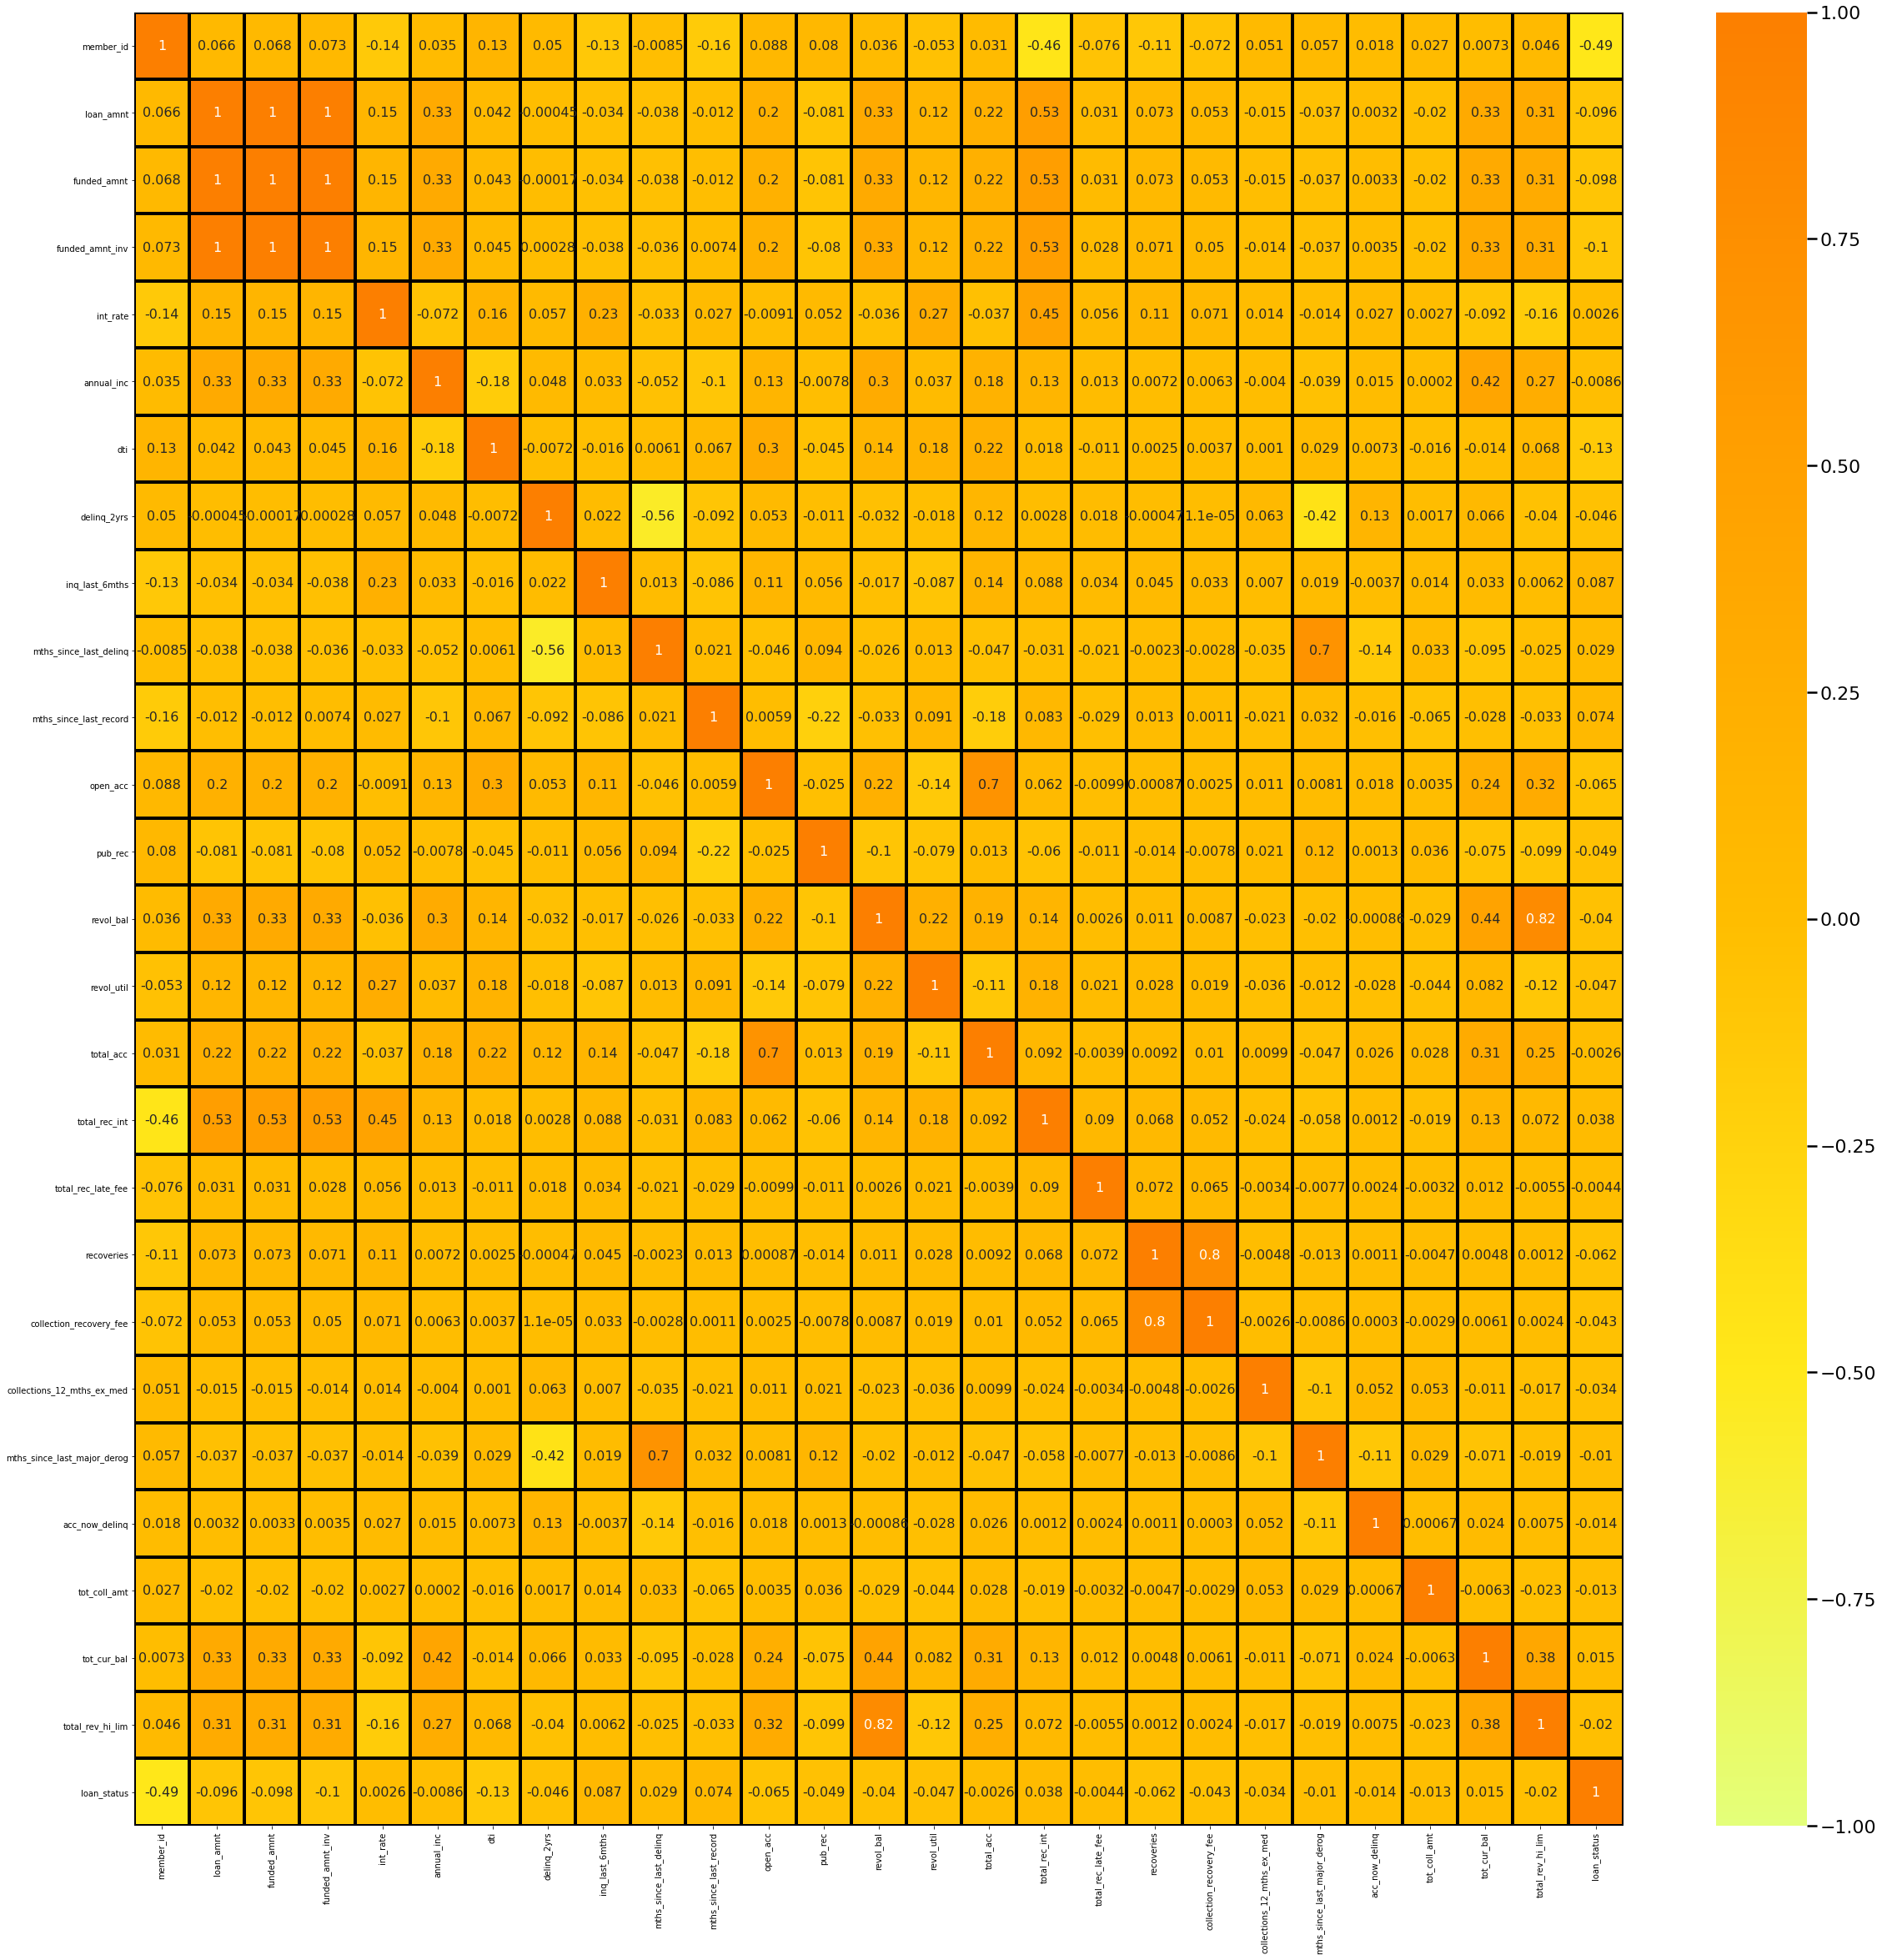

In [18]:
corr = data.corr()
plt.subplots(figsize=(40,40))
sns.set_context("poster",font_scale=1.0)
sns.heatmap(corr, cmap= 'Wistia', annot= True,vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black',annot_kws={"size":16})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Loan Amount Distribution')

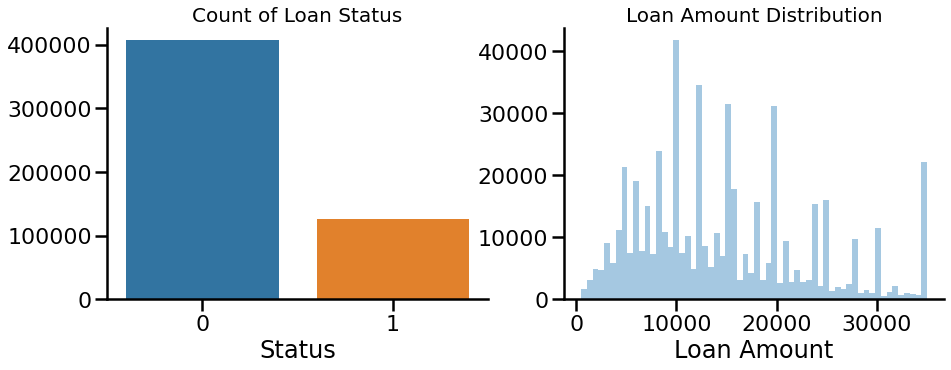

In [19]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='loan_status', data=data, ax=axes[0])
sns.distplot(data['loan_amnt'], kde=False, bins=60, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Status', ylabel='')
axes[0].set_title('Count of Loan Status', size=20)
axes[1].set(xlabel='Loan Amount', ylabel='')
axes[1].set_title('Loan Amount Distribution', size=20)

In [20]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406601.0,15206.679337,8499.937514,500.0,8700.0,14000.0,20000.0,35000.0
1,125827.0,13306.413965,8049.663290,500.0,7125.0,12000.0,18000.0,35000.0


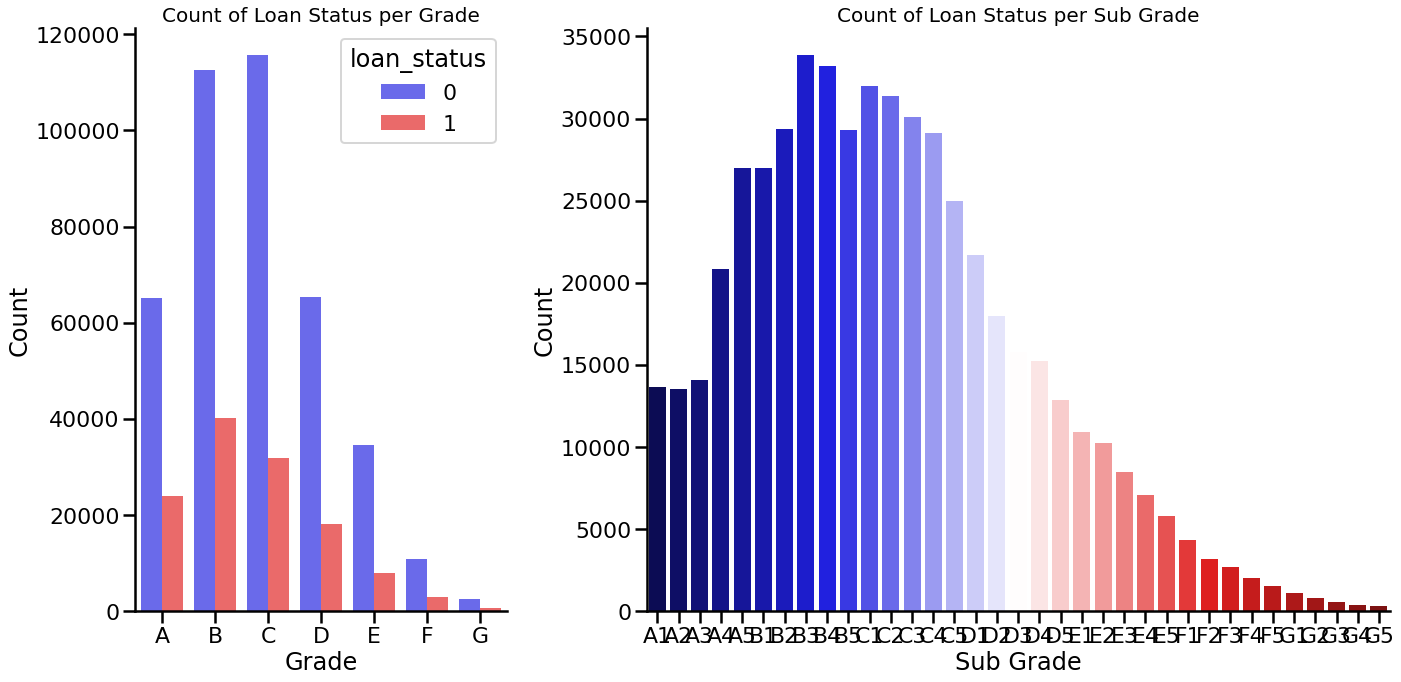

In [21]:
f, axes = plt.subplots(1, 2, figsize=(20,10), gridspec_kw={'width_ratios': [1, 2]})
sns.countplot(x='grade', hue='loan_status', data=data, order=sorted(data['grade'].unique()), palette='seismic', ax=axes[0])
sns.countplot(x='sub_grade', data=data, palette='seismic', order=sorted(data['sub_grade'].unique()), ax=axes[1])
sns.despine()
axes[0].set(xlabel='Grade', ylabel='Count')
axes[0].set_title('Count of Loan Status per Grade', size=20)
axes[1].set(xlabel='Sub Grade', ylabel='Count')
axes[1].set_title('Count of Loan Status per Sub Grade', size=20)
plt.tight_layout()

In [22]:
data.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

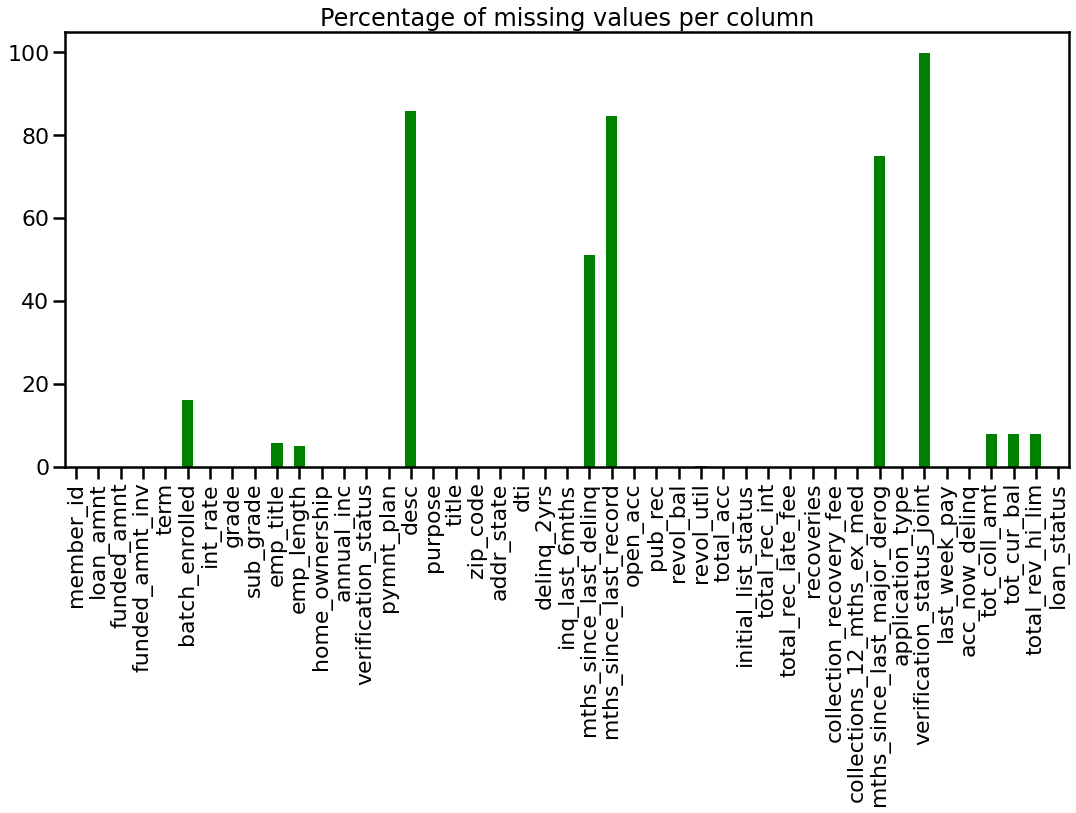

In [23]:
plt.figure(figsize=(18,8))
((data.isnull().sum())/len(data)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [24]:
print(data['emp_title'].nunique())
data['emp_title'].value_counts()

190124


Teacher                 8280
Manager                 6922
Registered Nurse        3387
Owner                   3305
RN                      3255
                        ... 
Master jeweler             1
heavy Equipiment           1
Electronic test tech       1
lead formin                1
Whitley Penn LLP           1
Name: emp_title, Length: 190124, dtype: int64

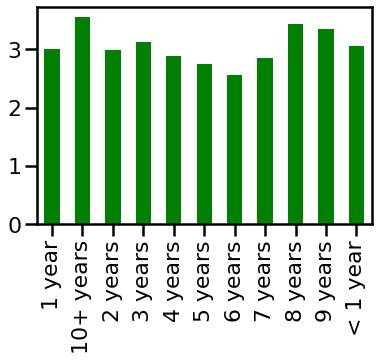

In [25]:
per_charge_off = data[data['loan_status'] == 0]['emp_length'].value_counts() / data[data['loan_status'] == 1]['emp_length'].value_counts()
per_charge_off.plot.bar(color='green')

In [26]:
columns_not_needed = ['emp_length','desc','mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog','verification_status_joint','funded_amnt','funded_amnt_inv','funded_amnt_inv','grade','title','emp_title','zip_code','addr_state','initial_list_status','total_rec_int','total_rec_late_fee']

In [27]:
data.drop(columns = columns_not_needed, inplace=True)

In [28]:
data.columns

Index(['member_id', 'loan_amnt', 'term', 'batch_enrolled', 'int_rate',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'loan_status'],
      dtype='object')

In [29]:
cat_cols = data.dtypes[data.dtypes == 'object'].index
cat_cols

Index(['term', 'batch_enrolled', 'sub_grade', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'application_type',
       'last_week_pay'],
      dtype='object')

In [30]:
data['batch_enrolled'].nunique()

104

In [31]:
data.drop(columns = ['batch_enrolled'], inplace=True)

In [32]:
data.drop(columns=['last_week_pay'], inplace=True)

In [33]:
data.drop(columns=['member_id'], inplace= True)

In [34]:
data.shape

(532428, 26)

In [35]:
data = data.dropna()
data.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
loan_status                   0
dtype: int64

In [36]:
data.shape

(490207, 26)

In [37]:
cat_var=[]
for i in data.columns:
  if i in cat_cols:
    cat_var.append(i)
cat_var

['term',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'application_type']

In [38]:
data_encode = pd.get_dummies(data=data, prefix='OHE', prefix_sep='_', columns= ['term','sub_grade','verification_status','pymnt_plan','purpose','application_type'], drop_first=True, dtype='int8')

In [39]:
data_encode.shape

(490207, 71)

In [40]:
data_encode['home_ownership'] = data_encode['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(data_encode['home_ownership'],drop_first=True)
data_encode = data_encode.drop('home_ownership',axis=1)
data_encode = pd.concat([data_encode,dummies],axis=1)

In [41]:
data_encode.shape

(490207, 73)

In [42]:
data_encode.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,OHE_60 months,OHE_A2,OHE_A3,OHE_A4,OHE_A5,OHE_B1,OHE_B2,OHE_B3,OHE_B4,OHE_B5,OHE_C1,OHE_C2,OHE_C3,OHE_C4,OHE_C5,OHE_D1,OHE_D2,OHE_D3,OHE_D4,OHE_D5,OHE_E1,OHE_E2,OHE_E3,OHE_E4,OHE_E5,OHE_F1,OHE_F2,OHE_F3,OHE_F4,OHE_F5,OHE_G1,OHE_G2,OHE_G3,OHE_G4,OHE_G5,OHE_Source Verified,OHE_Verified,OHE_y,OHE_credit_card,OHE_debt_consolidation,OHE_home_improvement,OHE_house,OHE_major_purchase,OHE_medical,OHE_moving,OHE_other,OHE_renewable_energy,OHE_small_business,OHE_vacation,OHE_wedding,OHE_JOINT,OTHER,OWN,RENT
0,14350,19.19,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,0.0,0.0,0.0,0.0,0.0,28699.0,30800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4800,10.99,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,0.0,0.0,0.0,0.0,0.0,9974.0,32900.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10000,7.26,45000.0,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,0.0,0.0,0.0,0.0,65.0,38295.0,34900.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,15000,19.72,105000.0,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,0.0,0.0,0.0,0.0,0.0,55564.0,24700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,16000,10.64,52000.0,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,0.0,0.0,0.0,0.0,0.0,47159.0,47033.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
X = data_encode.drop('loan_status',axis=1).values


# Label
y = data_encode['loan_status'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [44]:
data_encode.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,OHE_60 months,OHE_A2,OHE_A3,OHE_A4,OHE_A5,OHE_B1,OHE_B2,OHE_B3,OHE_B4,OHE_B5,OHE_C1,OHE_C2,OHE_C3,OHE_C4,OHE_C5,OHE_D1,OHE_D2,OHE_D3,OHE_D4,OHE_D5,OHE_E1,OHE_E2,OHE_E3,OHE_E4,OHE_E5,OHE_F1,OHE_F2,OHE_F3,OHE_F4,OHE_F5,OHE_G1,OHE_G2,OHE_G3,OHE_G4,OHE_G5,OHE_Source Verified,OHE_Verified,OHE_y,OHE_credit_card,OHE_debt_consolidation,OHE_home_improvement,OHE_house,OHE_major_purchase,OHE_medical,OHE_moving,OHE_other,OHE_renewable_energy,OHE_small_business,OHE_vacation,OHE_wedding,OHE_JOINT,OTHER,OWN,RENT
0,14350,19.19,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,0.0,0.0,0.0,0.0,0.0,28699.0,30800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4800,10.99,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,0.0,0.0,0.0,0.0,0.0,9974.0,32900.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10000,7.26,45000.0,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,0.0,0.0,0.0,0.0,65.0,38295.0,34900.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,15000,19.72,105000.0,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,0.0,0.0,0.0,0.0,0.0,55564.0,24700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,16000,10.64,52000.0,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,0.0,0.0,0.0,0.0,0.0,47159.0,47033.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(392165, 72)
(98042, 72)
(392165,)
(98042,)


In [46]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


In [47]:
model = Sequential()

# input layer
model.add(Dense(74,activation='relu'))
model.add(Dropout(0.3))


# hidden layer
model.add(Dense(37,activation='relu'))
model.add(Dropout(0.3))


# hidden layer
model.add(Dense(18,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(9,activation='relu'))
model.add(Dropout(0.3))


# output layer
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer="adam", loss='binary_crossentropy')

In [48]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [49]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          verbose = 2,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/400
1532/1532 - 7s - loss: 0.4852 - val_loss: 0.4362
Epoch 2/400
1532/1532 - 4s - loss: 0.4309 - val_loss: 0.4008
Epoch 3/400
1532/1532 - 4s - loss: 0.4141 - val_loss: 0.3947
Epoch 4/400
1532/1532 - 4s - loss: 0.4079 - val_loss: 0.3939
Epoch 5/400
1532/1532 - 3s - loss: 0.4048 - val_loss: 0.3911
Epoch 6/400
1532/1532 - 3s - loss: 0.4036 - val_loss: 0.3894
Epoch 7/400
1532/1532 - 4s - loss: 0.4027 - val_loss: 0.3905
Epoch 8/400
1532/1532 - 3s - loss: 0.4018 - val_loss: 0.3866
Epoch 9/400
1532/1532 - 4s - loss: 0.4016 - val_loss: 0.3885
Epoch 10/400
1532/1532 - 3s - loss: 0.4008 - val_loss: 0.3874
Epoch 11/400
1532/1532 - 3s - loss: 0.4004 - val_loss: 0.3892
Epoch 12/400
1532/1532 - 4s - loss: 0.4003 - val_loss: 0.3865
Epoch 13/400
1532/1532 - 4s - loss: 0.3993 - val_loss: 0.3866
Epoch 14/400
1532/1532 - 3s - loss: 0.3993 - val_loss: 0.3855
Epoch 15/400
1532/1532 - 4s - loss: 0.3984 - val_loss: 0.3857
Epoch 16/400
1532/1532 - 4s - loss: 0.3983 - val_loss: 0.3892
Epoch 17/400
1532

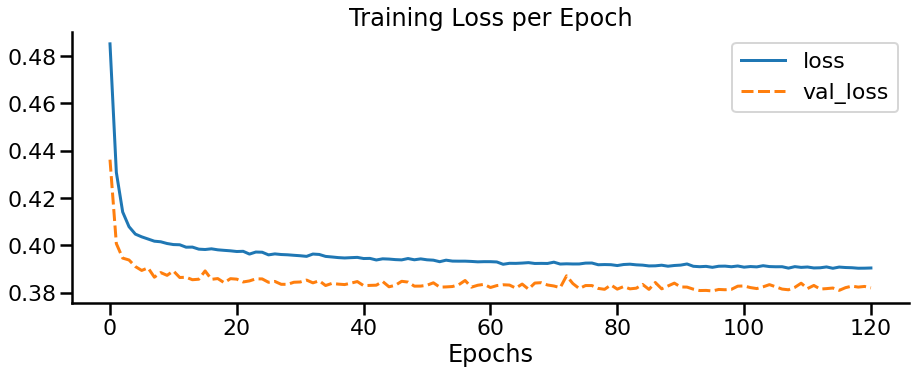

In [50]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [51]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier(class_weight='balanced')
cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
b = cls.predict(X_test)

In [53]:
roc_auc_score(b,y_test)

0.7484602528965794

In [54]:
print(classification_report(y_test,b))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     79502
           1       0.68      0.08      0.14     18540

    accuracy                           0.82     98042
   macro avg       0.75      0.53      0.52     98042
weighted avg       0.79      0.82      0.75     98042



In [55]:
confusion_matrix(b,y_test)

array([[78827, 17135],
       [  675,  1405]])

In [56]:
b = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [58]:
preds=[]
for i in b:
  preds.append(i[0])

In [59]:
roc_auc_score(preds,y_test)

0.7396311666768169

In [60]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     79502
           1       0.65      0.16      0.26     18540

    accuracy                           0.82     98042
   macro avg       0.74      0.57      0.58     98042
weighted avg       0.80      0.82      0.78     98042



In [61]:
confusion_matrix(y_test,preds)

array([[77824,  1678],
       [15488,  3052]])

In [62]:
buff = data.drop(columns = ['loan_status'], inplace=False)
buff.shape

(490207, 25)

In [63]:
cols = buff.columns
len(cols)

25

In [64]:
sub_data =data_tst[cols]
sub_data.shape

(354951, 25)

In [65]:
sub_cat_cols = sub_data.dtypes[data.dtypes == 'object'].index
sub_cat_cols

Index(['term', 'sub_grade', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'application_type'],
      dtype='object')

In [66]:
sub_data.shape

(354951, 25)

In [67]:
sub_data_encode = pd.get_dummies(data=sub_data, prefix='OHE', prefix_sep='_', columns= ['term','sub_grade','verification_status','pymnt_plan','application_type'], drop_first=True, dtype='int8')

In [68]:
sub_data_encode.shape

(354951, 59)

In [69]:
sub_data_encode['home_ownership'] = sub_data_encode['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(sub_data_encode['home_ownership'],drop_first=True)
sub_data_encode = sub_data_encode.drop('home_ownership',axis=1)
sub_data_encode = pd.concat([sub_data_encode,dummies],axis=1)

In [70]:
sub_data_encode['purpose'] = sub_data_encode['purpose'].replace(['educational'], 'other')
dummies = pd.get_dummies(sub_data_encode['purpose'],drop_first=True)
sub_data_encode = sub_data_encode.drop('purpose',axis=1)
sub_data_encode = pd.concat([sub_data_encode,dummies],axis=1)

In [71]:
sub_data_encode.shape

(354951, 72)

In [72]:
sub_data_encode = sub_data_encode.dropna()
sub_data_encode.isnull().sum()

loan_amnt           0
int_rate            0
annual_inc          0
dti                 0
delinq_2yrs         0
                   ..
other               0
renewable_energy    0
small_business      0
vacation            0
wedding             0
Length: 72, dtype: int64

In [73]:
subm_data = sub_data_encode.values
print(subm_data.shape)
y_sub = model.predict_classes(subm_data)
y_sub.shape

(326515, 72)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(326515, 1)

In [74]:
y_subm=[]
for i in y_sub:
  y_subm.append(i[0])